# AMLS final project

This notebook contains the work for the ELEC0134 Applied Machine Learning Systems class at UCL.

## Using Drive with Colab, typical imports

In [1]:
# Set up Google Drive for use with Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from fastai.vision import *
from fastai.metrics import error_rate

## Changing directory, sanity checks

In [0]:
root_dir = "/content/drive/My Drive/"
change_dir = root_dir + "dataset_AMLS_19-20/celeba"

os.chdir(change_dir)

In [15]:
# Check current directory
!pwd

/content/drive/My Drive/dataset_AMLS_19-20/celeba


In [16]:
# List contents of directory
!ls

img  labels.csv


## Importing the data, data inspection and pre-processing

In [0]:
# Import data as dataframe, drop unnecessary column
df = pd.read_csv("labels.csv", sep="\t")

# Create separate dataframes for gender and smiling
df_gender = df.copy()
df_smiling = df.copy()

df_gender.drop(df_gender.columns[0], axis=1, inplace=True)
df_gender.drop(df_gender.columns[2], axis=1, inplace=True)

df_smiling.drop(df_smiling.columns[0], axis=1, inplace=True)
df_smiling.drop(df_smiling.columns[1], axis=1, inplace=True)

In [70]:
# Inspect data
df.head()

,Unnamed: 0,img_name,gender,smiling
0,0,0.jpg,-1,1
1,1,1.jpg,-1,1
2,2,2.jpg,1,-1
3,3,3.jpg,-1,-1
4,4,4.jpg,-1,-1


In [71]:
df_gender.head()

,img_name,gender
0,0.jpg,-1
1,1.jpg,-1
2,2.jpg,1
3,3.jpg,-1
4,4.jpg,-1


In [72]:
df_smiling.head()

,img_name,smiling
0,0.jpg,1
1,1.jpg,1
2,2.jpg,-1
3,3.jpg,-1
4,4.jpg,-1


In [0]:
# Set the path to the directory with the images
path = change_dir + "/img"

# Create an ImageDataBunch object using the labels from the gender dataframe
# Set size to be 64x64, transform conforms to this size
# Normalization helps with training
data_gender = ImageDataBunch.from_df(path, df_gender, ds_tfms=get_transforms(), size=128).normalize(imagenet_stats)

# Repeat above for smiling dataframe
data_smiling = ImageDataBunch.from_df(path, df_smiling, ds_tfms=get_transforms(), size=128).normalize(imagenet_stats)

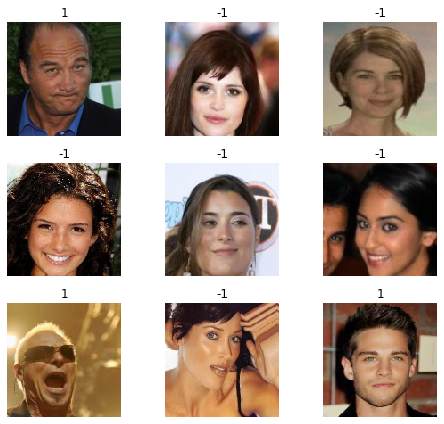

In [89]:
# Show batch from data_gender
data_gender.show_batch(rows=3, figsize=(7,6))

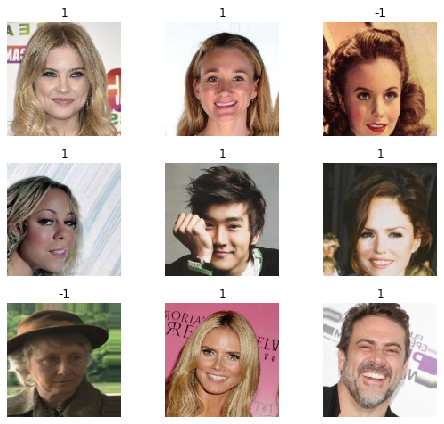

In [90]:
# Show batch from data_smiling
data_smiling.show_batch(rows=3, figsize=(7,6))

## Training the models

In [0]:
# Create two models to learn gender and smiling
learn_gender = cnn_learner(data_gender, models.resnet34, metrics=error_rate)
learn_smiling = cnn_learner(data_smiling, models.resnet34, metrics=error_rate)

In [100]:
# Train gender model
learn_gender.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.566356,0.325575,0.113000,00:28
1,0.415427,0.228925,0.090000,00:28
2,0.311247,0.204998,0.077000,00:27
3,0.261646,0.188796,0.073000,00:27


In [103]:
# Train smiling model
learn_smiling.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.993791,0.748656,0.305000,00:27
1,0.771545,0.540230,0.273000,00:27
2,0.616348,0.497151,0.238000,00:27
3,0.528949,0.497827,0.244000,00:28


## Interpreting the results of the gender and smiling model

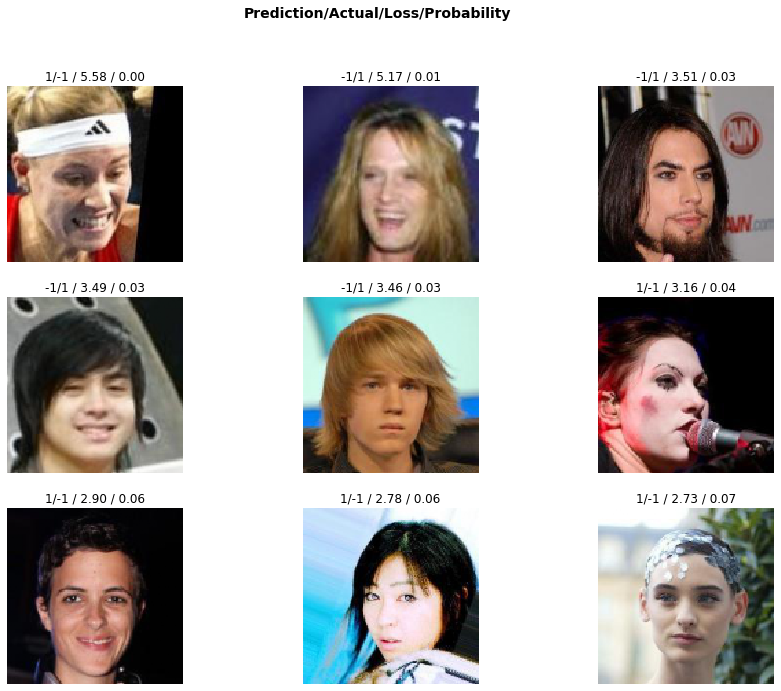

In [102]:
# Plot top losses for gender model
interp_gender = ClassificationInterpretation.from_learner(learn_gender)
interp_gender.plot_top_losses(9, figsize=(15,11))

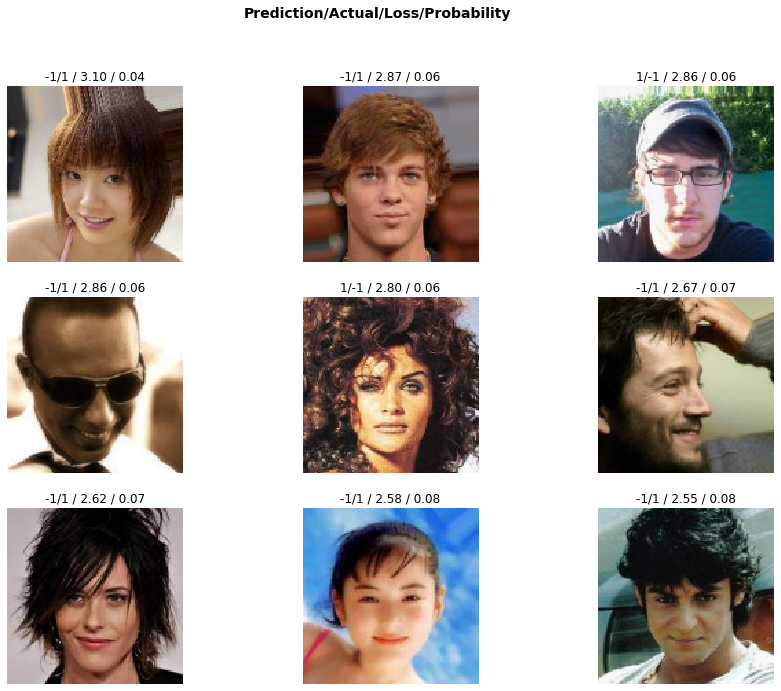

In [104]:
# Plot top losses for smiling model
interp_smiling = ClassificationInterpretation.from_learner(learn_smiling)
interp_smiling.plot_top_losses(9, figsize=(15,11))